<a href="https://colab.research.google.com/github/yuione51/sample/blob/main/payment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd

payment = pd.read_csv('결제리스트.csv', low_memory=False)

In [60]:
print(payment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410849 entries, 0 to 410848
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   학습 학교 구분  410849 non-null  object
 1   최초결제일     410849 non-null  object
 2   결제금액      410849 non-null  int64 
 3   상품명       410849 non-null  object
 4   학부모아이디    410849 non-null  object
 5   학습자아이디    410849 non-null  object
 6   실적교사이름    410614 non-null  object
 7   실적교사ID    410614 non-null  object
 8   학생고유ID    410849 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 28.2+ MB
None


In [61]:
print(payment.isnull().sum())

학습 학교 구분      0
최초결제일         0
결제금액          0
상품명           0
학부모아이디        0
학습자아이디        0
실적교사이름      235
실적교사ID      235
학생고유ID        0
dtype: int64


In [62]:
# '최초결제일'을 datetime 형식으로 변환
payment['최초결제일'] = pd.to_datetime(payment['최초결제일'], format='%Y-%m-%d')

In [63]:
# 새로운 피처 생성
payment['결제월'] = payment['최초결제일'].dt.month
payment['결제년'] = payment['최초결제일'].dt.year


In [64]:
# 2018년도 데이터 삭제
payment = payment[payment['결제년'] != 2018]

In [65]:
# 정상 유료 상품만 필터링
payment = payment[~payment['상품명'].str.contains('공공|공헌|비대면|꿈바당|비관리|무관리|KT')]

In [66]:
# 정상 유료 상품만 필터링
payment = payment[~payment['상품명'].str.contains('제휴|직가입|바우처')]

In [67]:
# 결측치 처리 - 'Unknown'으로 대체
payment['실적교사이름'].fillna('Unknown', inplace=True)
payment['실적교사ID'].fillna('Unknown', inplace=True)

<ipython-input-67-c725b6e88083>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payment['실적교사이름'].fillna('Unknown', inplace=True)


In [68]:
# 실적교사 필터링
payment.loc[~payment['실적교사ID'].str.contains('tc_'), '실적교사이름'] = 'Unknown'

In [69]:
# 상품 정규화

# 기간 정규화
duration_keywords = {
    '26개월' : ['26개월'],
    '25개월' : ['25개월'],
    '24개월' : ['24개월'],
    '12개월': ['12개월'],
    '11개월' : ['11개월'],
    '6개월': ['6개월']
}

def normalize_duration(name):
    for key, values in duration_keywords.items():
        for value in values:
            if value in name:
                return key
    return ''

payment['기간'] = payment['상품명'].apply(normalize_duration)
duration_not_normalized = payment[payment['기간'] == '']['상품명'].tolist()

In [70]:
# 형태 정규화
type_keywords = {
    '기간연장': ['연장']
}

def normalize_type(name):
    for key, values in type_keywords.items():
        for value in values:
            if value in name:
                return key
    return '신규'  # 연장이 포함되지 않은 경우

payment['형태'] = payment['상품명'].apply(normalize_type)
type_not_normalized = payment[payment['형태'] == '신규']['상품명'].tolist()

# 결과 출력
print(payment[['상품명', '형태']])

                                    상품명    형태
1               [W형] 12개월 홈런학습/학습기 변경_R    신규
2       [중등][S형]기간연장 12개월 학습(월분할결제_ARS)  기간연장
3          [W형]홈런 12개월 기간연장(월별선불결제_ARS)  기간연장
4            [중등][N형]12개월 학습(월분할결제_ARS)    신규
5           [W형]홈런 6개월 기간연장(월별선불결제_ARS)  기간연장
...                                 ...   ...
410844               [홈런] 초등 홈런 24개월 정가    신규
410845               [홈런] 초등 홈런 24개월 정가    신규
410846               [하루30] 초등 24개월(특가)    신규
410847               [홈런] 중등 홈런 24개월 정가    신규
410848               [하루30] 초등 24개월(특가)    신규

[407425 rows x 2 columns]


In [71]:
# 학년 정규화
grade_keywords = {
    '리틀': ['리틀'],
    '중등': ['중등']
}

def normalize_grade(name):
    for key, values in grade_keywords.items():
        for value in values:
            if value in name:
                return key
    return '초등'

payment['학년_정규화'] = payment['상품명'].apply(normalize_grade)
grade_not_normalized = payment[payment['학년_정규화'] == '초등']['상품명'].tolist()

# 결과 출력
print(payment[['상품명', '학년_정규화']])

                                    상품명 학년_정규화
1               [W형] 12개월 홈런학습/학습기 변경_R     초등
2       [중등][S형]기간연장 12개월 학습(월분할결제_ARS)     중등
3          [W형]홈런 12개월 기간연장(월별선불결제_ARS)     초등
4            [중등][N형]12개월 학습(월분할결제_ARS)     중등
5           [W형]홈런 6개월 기간연장(월별선불결제_ARS)     초등
...                                 ...    ...
410844               [홈런] 초등 홈런 24개월 정가     초등
410845               [홈런] 초등 홈런 24개월 정가     초등
410846               [하루30] 초등 24개월(특가)     초등
410847               [홈런] 중등 홈런 24개월 정가     중등
410848               [하루30] 초등 24개월(특가)     초등

[407425 rows x 2 columns]


In [72]:
# 최종 정규화된 상품명 생성
payment['상품명_정리'] = payment.apply(lambda row: f"{row['형태']}/{row['기간']}/{row['학년_정규화']}".strip('/'), axis=1)

In [73]:
# 일시납과 월납 구분 (결제 금액이 20만원 이상이면 일시납으로 간주)
payment['결제구분'] = payment['결제금액'].apply(lambda x: '일시납' if x > 200000 else '월납')

In [74]:
# 월납과 일시납 비율 계산
payment_counts = payment['결제구분'].value_counts(normalize=True) * 100

# 결과 출력
print(payment_counts)

결제구분
월납     99.338283
일시납     0.661717
Name: proportion, dtype: float64


일시납이 전체 데이터에서 차지하는 비율이 약 0.66%로 매우 적은 비율임.
이는 전체 데이터의 대부분이 월납 결제라는 것을 의미.
일시납을 월납으로 변환해도 데이터의 전체적인 분석에 큰 영향을 미치지 않을 가능성이 높기에 일시납을 월납으로 변환.

In [75]:
# 기간에서 '개월'을 제외하고 숫자로 변환
payment['기간_숫자'] = payment['기간'].str.replace('개월', '').astype(int)

In [76]:
# 일시납 금액을 월납 금액으로 변환
payment.loc[payment['결제구분'] == '일시납', '결제금액'] = payment.loc[payment['결제구분'] == '일시납', '결제금액'] / payment.loc[payment['결제구분'] == '일시납', '기간_숫자']

# 결과 확인
print(payment.head())

  학습 학교 구분      최초결제일    결제금액                              상품명      학부모아이디  \
1       초등 2019-01-01   79000          [W형] 12개월 홈런학습/학습기 변경_R  dasomi1514   
2       중등 2019-01-01   79000  [중등][S형]기간연장 12개월 학습(월분할결제_ARS)    bini0905   
3       초등 2019-01-01   79000     [W형]홈런 12개월 기간연장(월별선불결제_ARS)    jiheonee   
4       중등 2019-01-01  134000       [중등][N형]12개월 학습(월분할결제_ARS)     eun1976   
5       초등 2019-01-01   79000      [W형]홈런 6개월 기간연장(월별선불결제_ARS)     zxc0265   

       학습자아이디   실적교사이름         실적교사ID   학생고유ID  결제월   결제년    기간    형태 학년_정규화  \
1  Kimseoha09      조문희      tc_mh1547  1610794    1  2019  12개월    신규     초등   
2    bini7007  이연희(M6)  tc_nabiya0301   737548    1  2019  12개월  기간연장     중등   
3   subin0106      감정희   tc_kamjh0715  1060642    1  2019  12개월  기간연장     초등   
4     dkemsla   금정숙(F)     tc_kum1077  1559238    1  2019  12개월    신규     중등   
5    zxcv4571  유희정(종료)     tc_yhj2457  1066220    1  2019   6개월  기간연장     초등   

         상품명_정리 결제구분  기간_숫자  
1    신규/12개월/초등   월납

In [77]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.dpi'] = 100

# 폰트 경로 설정
font_path = '/content/malgun.ttf'

# 폰트 매니저에 폰트 추가
fm.fontManager.addfont(font_path)
plt.rc('font', family='Malgun Gothic')

plt.rcParams['font.family']

['Malgun Gothic']

In [78]:
plt.rc('font', family = 'Malgun Gothic')

In [79]:
# 월별 평균 결제 금액 계산
monthly_avg_payment = payment.groupby(['결제년', '결제월'])['결제금액'].mean().reset_index()

# 결제년과 결제월을 합쳐서 새로운 컬럼 생성 (시각화를 위해)
monthly_avg_payment['년월'] = monthly_avg_payment['결제년'].astype(str) + '-' + monthly_avg_payment['결제월'].astype(str)

# 결과 확인
print(monthly_avg_payment.head())

    결제년  결제월          결제금액      년월
0  2019    1  96751.764676  2019-1
1  2019    2  94031.267899  2019-2
2  2019    3  94651.693973  2019-3
3  2019    4  91487.797324  2019-4
4  2019    5  90705.756296  2019-5


In [80]:
# 데이터를 연도별로 필터링
data_2019 = monthly_avg_payment[monthly_avg_payment['결제년'] == 2019]
data_2020 = monthly_avg_payment[monthly_avg_payment['결제년'] == 2020]
data_2021 = monthly_avg_payment[monthly_avg_payment['결제년'] == 2021]
data_2022 = monthly_avg_payment[monthly_avg_payment['결제년'] == 2022]
data_2023 = monthly_avg_payment[monthly_avg_payment['결제년'] == 2023]


In [81]:
# 전체 데이터에서 통계값 계산
overall_avg_value = monthly_avg_payment['결제금액'].mean()
overall_max_value = monthly_avg_payment['결제금액'].max()
overall_min_value = monthly_avg_payment['결제금액'].min()


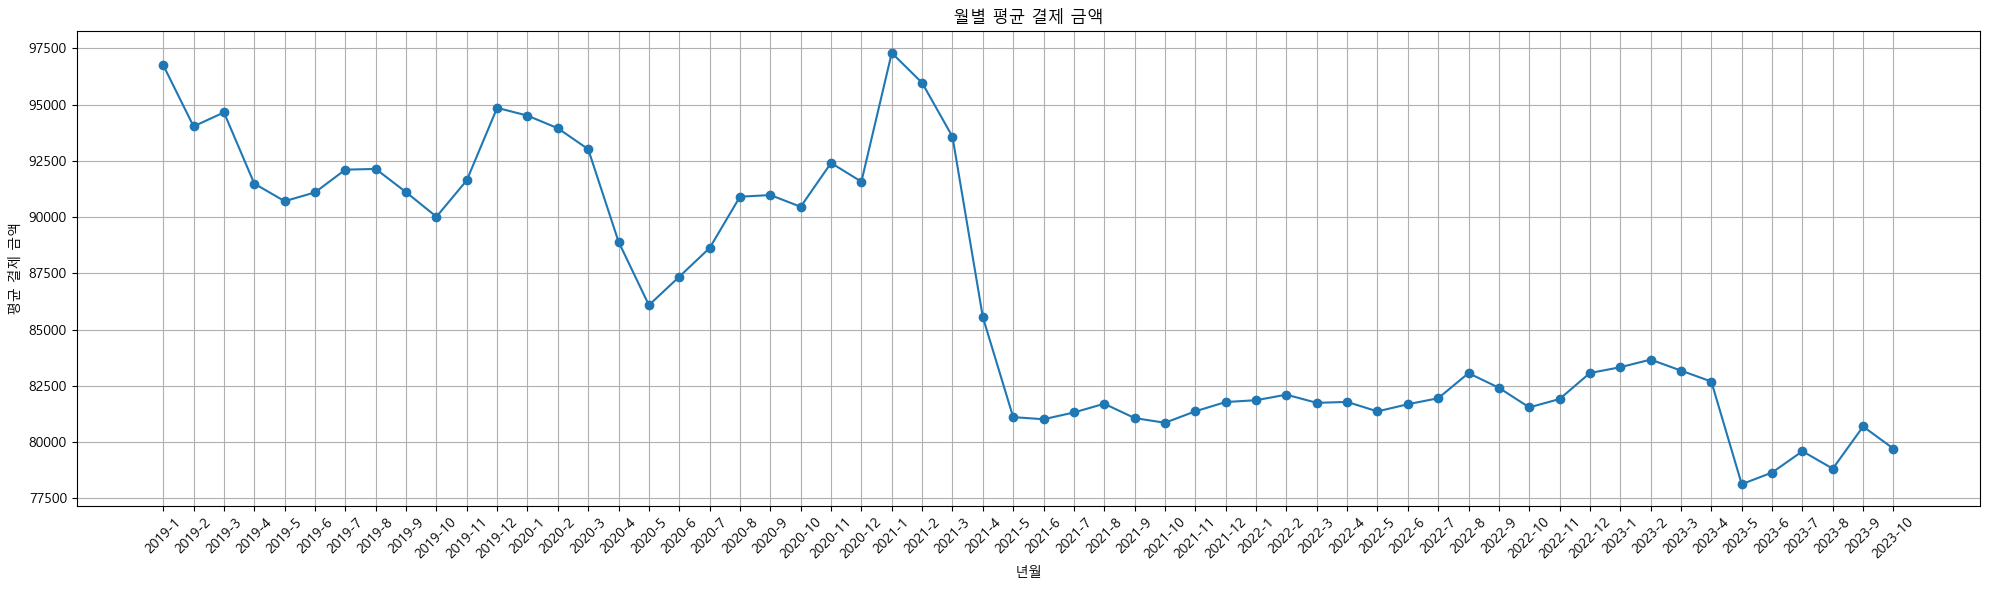

In [82]:
# 시각화
plt.figure(figsize=(20, 6))
plt.plot(monthly_avg_payment['년월'], monthly_avg_payment['결제금액'], marker='o')
plt.xticks(rotation=45)
plt.xlabel('년월')
plt.ylabel('평균 결제 금액')
plt.title('월별 평균 결제 금액')
plt.grid(True)
plt.tight_layout()
plt.show()

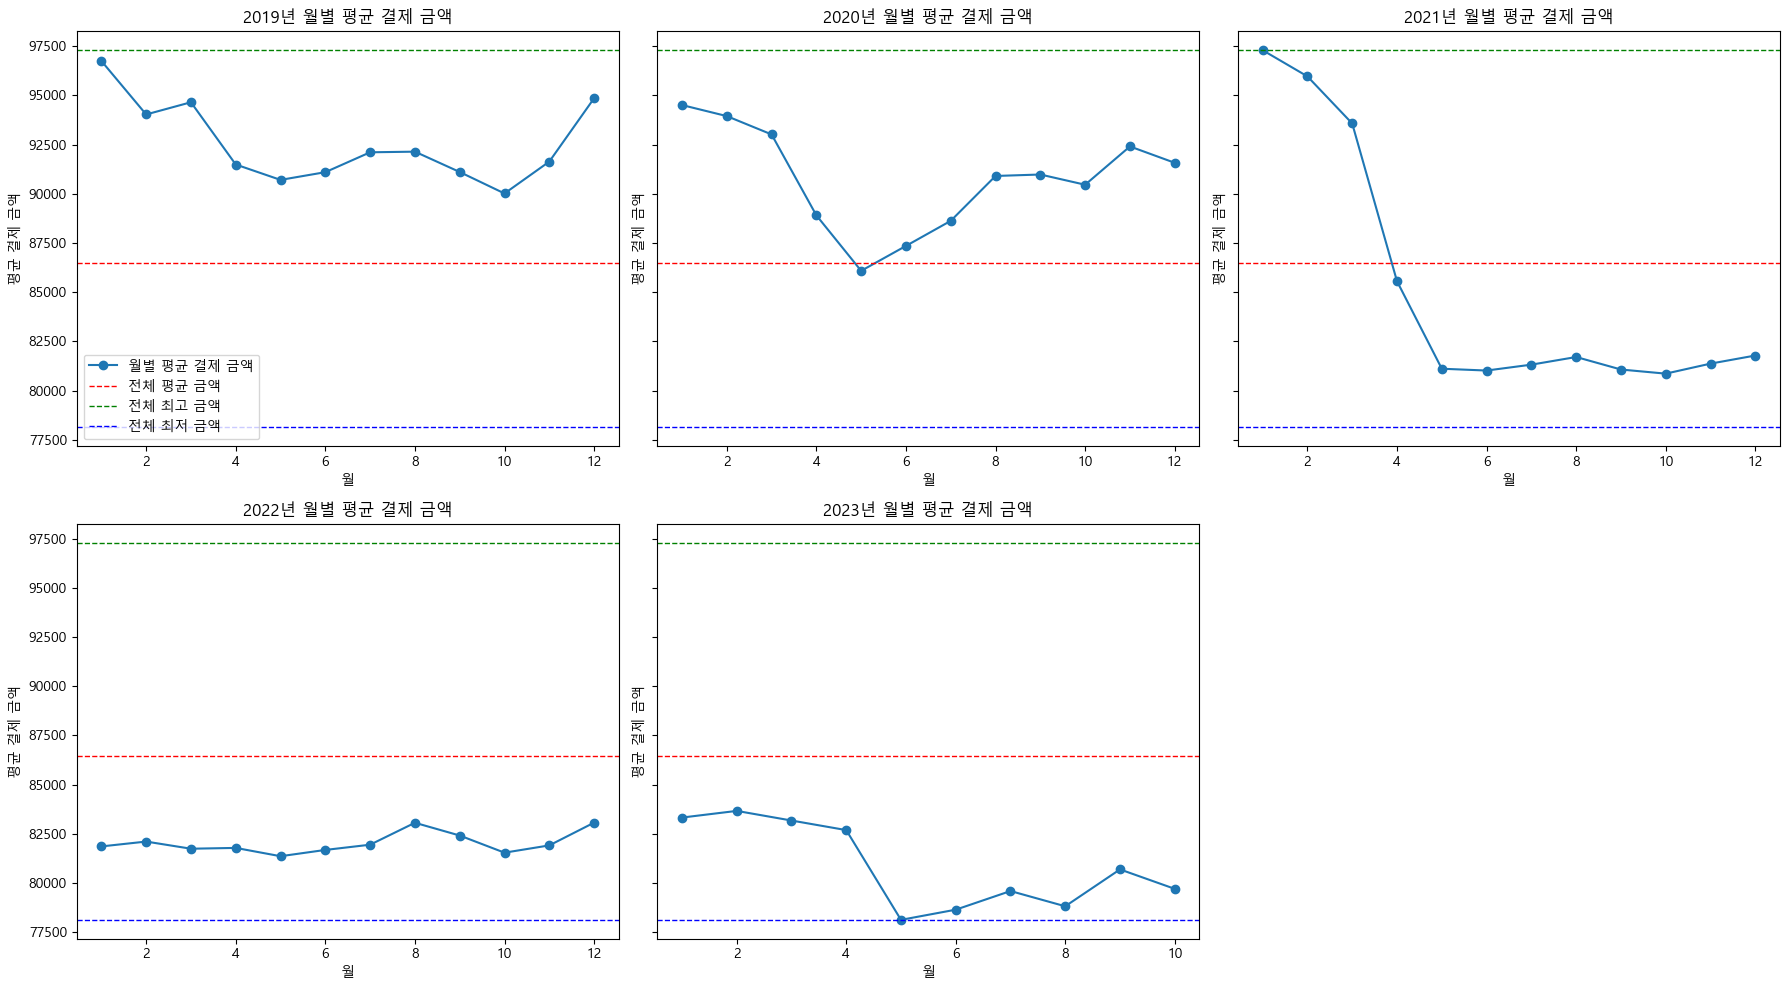

In [83]:
# 서브플롯 생성
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)

# 그래프를 그리는 함수 정의
def plot_yearly_data(ax, data, year):
    ax.plot(data['결제월'], data['결제금액'], marker='o', label='월별 평균 결제 금액')
    ax.set_title(f'{year}년 월별 평균 결제 금액')
    ax.set_xlabel('월')
    ax.set_ylabel('평균 결제 금액')

    # 전체 통계값을 선으로 추가
    ax.axhline(overall_avg_value, color='r', linestyle='--', linewidth=1, label='전체 평균 금액' if year == 2019 else "")
    ax.axhline(overall_max_value, color='g', linestyle='--', linewidth=1, label='전체 최고 금액' if year == 2019 else "")
    ax.axhline(overall_min_value, color='b', linestyle='--', linewidth=1, label='전체 최저 금액' if year == 2019 else "")

    # 범례 추가 (첫 번째 그래프에만 범례 표시)
    if year == 2019:
        ax.legend()

# 각 연도별 그래프 그리기
plot_yearly_data(axes[0, 0], data_2019, 2019)
plot_yearly_data(axes[0, 1], data_2020, 2020)
plot_yearly_data(axes[0, 2], data_2021, 2021)
plot_yearly_data(axes[1, 0], data_2022, 2022)
plot_yearly_data(axes[1, 1], data_2023, 2023)

# 빈 서브플롯 채우기 (그래프가 5개이므로 빈 공간이 하나 남음)
axes[1, 2].axis('off')

# 레이아웃 조정 및 표시
plt.tight_layout()
plt.show()

In [84]:
# 학습 학교 구분별 결제 금액 통계 계산
grouped = payment.groupby('학습 학교 구분')['결제금액'].agg(['mean', 'std', 'max', 'min']).reset_index()
grouped.columns = ['학습 학교 구분', '평균 결제 금액', '결제 금액 표준 편차', '최대 결제 금액', '최소 결제 금액']

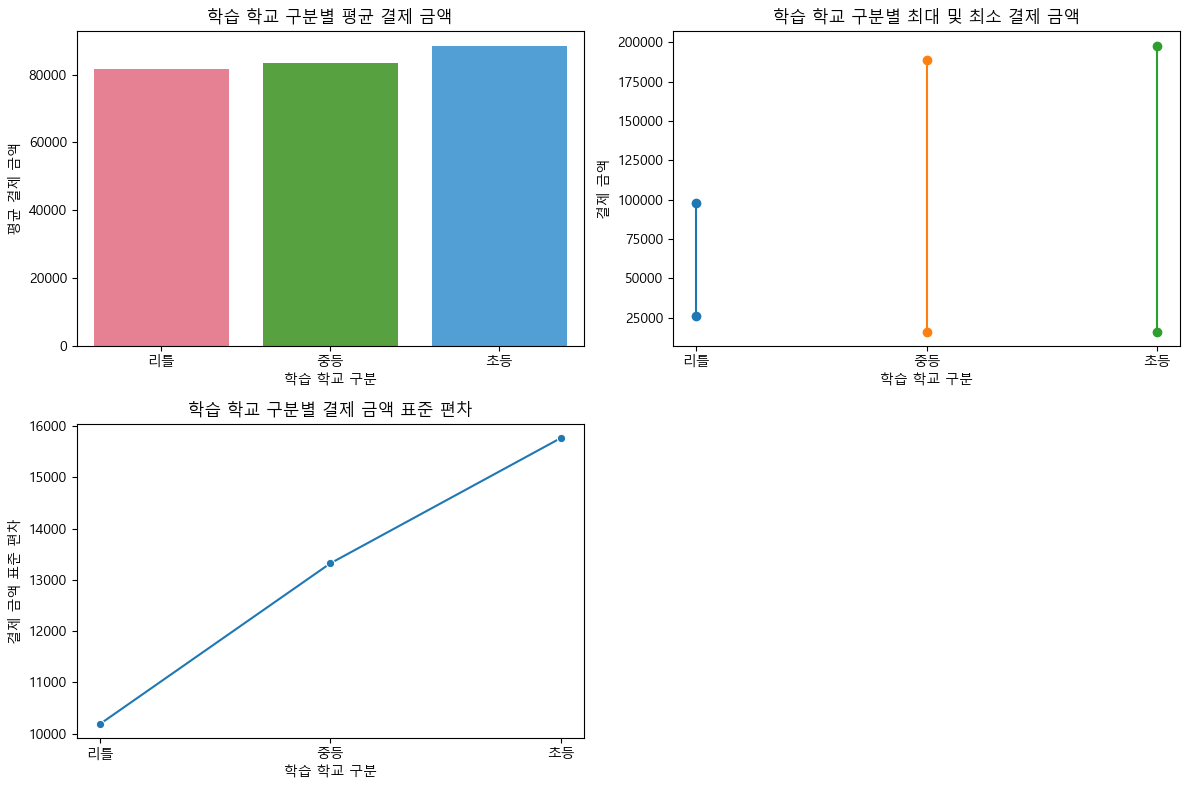

In [85]:
import seaborn as sns

# 2x2로 그래프 출력
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 막대 그래프로 시각화 (평균 결제 금액)
colors = sns.color_palette('husl', len(grouped))
sns.barplot(ax=axes[0, 0], x='학습 학교 구분', y='평균 결제 금액', hue='학습 학교 구분', data=grouped, palette=colors, dodge=False, legend=False)
axes[0, 0].set_title('학습 학교 구분별 평균 결제 금액')
axes[0, 0].set_xlabel('학습 학교 구분')
axes[0, 0].set_ylabel('평균 결제 금액')

# 범위 플롯으로 시각화 (최대, 최소 결제 금액)
for idx, row in grouped.iterrows():
    axes[0, 1].plot([row['학습 학교 구분'], row['학습 학교 구분']], [row['최소 결제 금액'], row['최대 결제 금액']], marker='o')
axes[0, 1].set_title('학습 학교 구분별 최대 및 최소 결제 금액')
axes[0, 1].set_xlabel('학습 학교 구분')
axes[0, 1].set_ylabel('결제 금액')

# 선 그래프로 시각화 (결제 금액 표준 편차)
sns.lineplot(ax=axes[1, 0], x='학습 학교 구분', y='결제 금액 표준 편차', data=grouped, marker='o', sort=False)
axes[1, 0].set_title('학습 학교 구분별 결제 금액 표준 편차')
axes[1, 0].set_xlabel('학습 학교 구분')
axes[1, 0].set_ylabel('결제 금액 표준 편차')

# 빈 그래프 채우기
axes[1, 1].axis('off')  # 빈칸은 비활성화

plt.tight_layout()
plt.show()

In [86]:
# 실적교사 필터링
payment = payment[~payment['실적교사이름'].str.contains('Unknown')]

In [87]:
# 각 실적교사별로 그룹화하여 주요 지표 계산
teacher_summary = payment.groupby('실적교사이름').agg(
    총결제금액=('결제금액', 'sum'),
    평균결제금액=('결제금액', 'mean'),
    결제건수=('결제금액', 'count')
).reset_index()

# 결과 확인
print(teacher_summary.head())

     실적교사이름     총결제금액        평균결제금액  결제건수
0  가성진(방문F)  35802900  95986.327078   373
1   가은영(종료)   4598050  82108.035714    56
2       감서윤  22938450  82512.410072   278
3       감정희  16541250  80689.024390   205
4       강가영    141600  70800.000000     2


In [88]:
# 상위 10% 실적교사
top_10_percent = teacher_summary.nlargest(int(len(teacher_summary) * 0.1), '총결제금액')

# 하위 10% 실적교사
bottom_10_percent = teacher_summary.nsmallest(int(len(teacher_summary) * 0.1), '총결제금액')

# 상위 10%와 하위 10% 비교
comparison_summary = pd.DataFrame({
    '총결제금액': [top_10_percent['총결제금액'].mean(), bottom_10_percent['총결제금액'].mean()],
    '평균결제금액': [top_10_percent['평균결제금액'].mean(), bottom_10_percent['평균결제금액'].mean()],
    '결제건수': [top_10_percent['결제건수'].mean(), bottom_10_percent['결제건수'].mean()]
}, index=['상위 10%', '하위 10%'])

print(comparison_summary)

               총결제금액        평균결제금액        결제건수
상위 10%  5.698028e+07  92414.956611  599.276860
하위 10%  1.392626e+05  94939.669421    1.512397


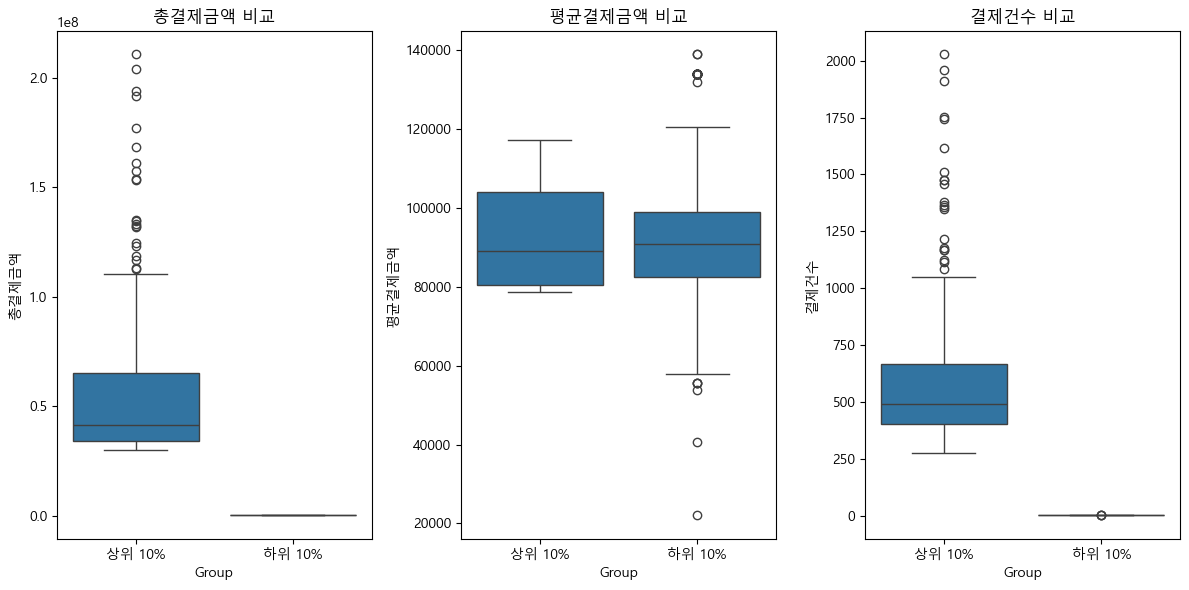

In [89]:
# 상위 10%와 하위 10% 실적교사 비교를 위한 데이터프레임 준비
top_bottom = pd.concat([top_10_percent.assign(Group='상위 10%'), bottom_10_percent.assign(Group='하위 10%')])

# 박스 플롯 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='Group', y='총결제금액', data=top_bottom)
plt.title('총결제금액 비교')

plt.subplot(1, 3, 2)
sns.boxplot(x='Group', y='평균결제금액', data=top_bottom)
plt.title('평균결제금액 비교')

plt.subplot(1, 3, 3)
sns.boxplot(x='Group', y='결제건수', data=top_bottom)
plt.title('결제건수 비교')

plt.tight_layout()
plt.show()

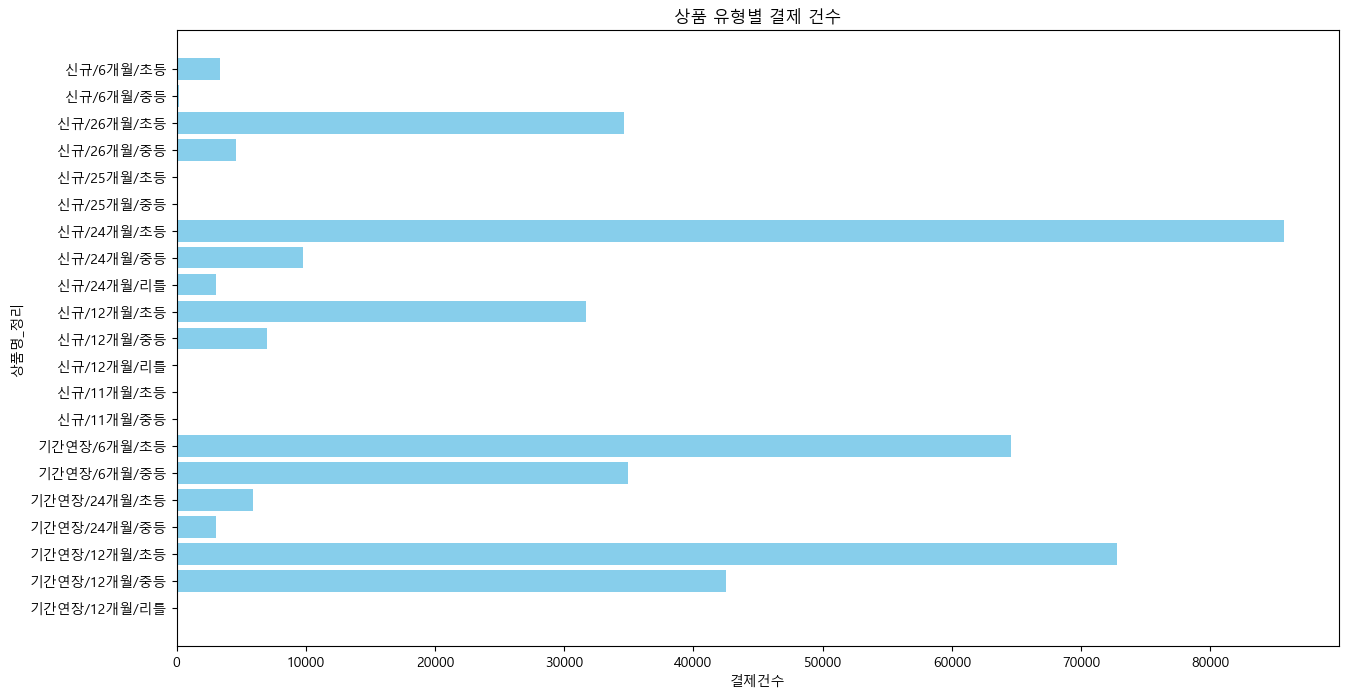

In [90]:
# 상품 유형별 결제 건수 계산
product_count = payment.groupby('상품명_정리').size().reset_index(name='결제건수')

# 시각화
plt.figure(figsize=(15, 8))
plt.barh(product_count['상품명_정리'], product_count['결제건수'], color='skyblue')
plt.xlabel('결제건수')
plt.ylabel('상품명_정리')
plt.title('상품 유형별 결제 건수')
plt.show()

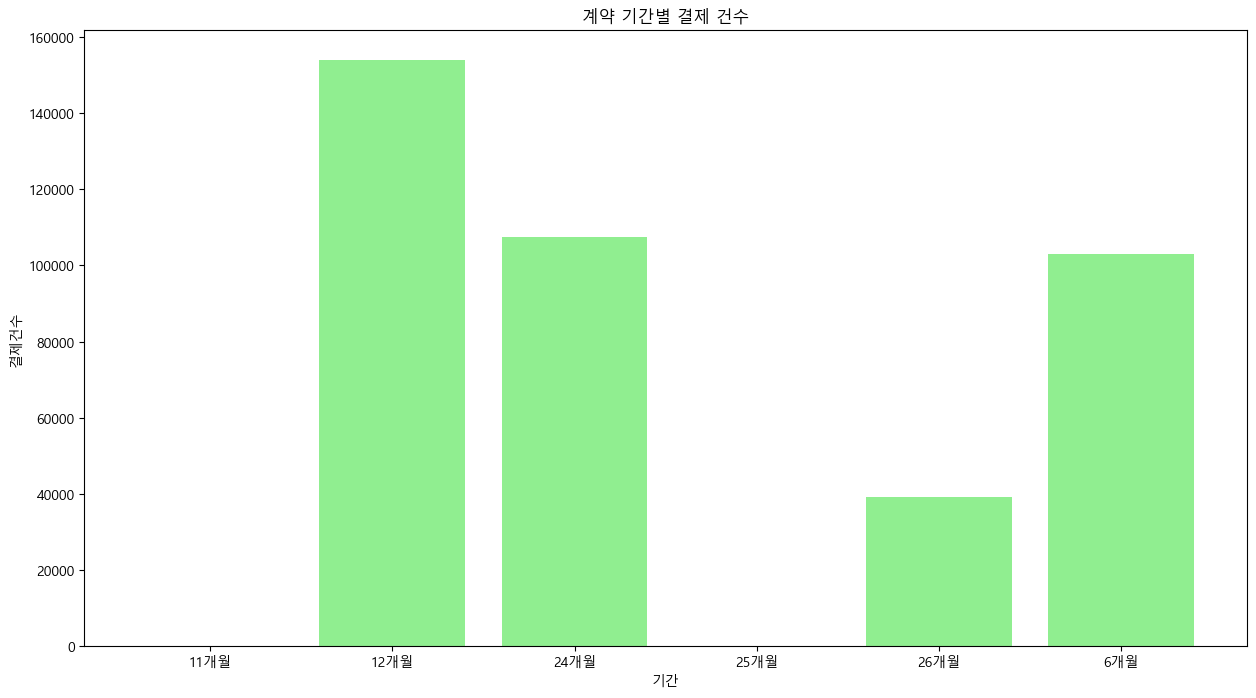

In [91]:
# 계약 기간별 결제 건수 계산
period_count = payment.groupby('기간').size().reset_index(name='결제건수')

# 시각화
plt.figure(figsize=(15, 8))
plt.bar(period_count['기간'], period_count['결제건수'], color='lightgreen')
plt.xlabel('기간')
plt.ylabel('결제건수')
plt.title('계약 기간별 결제 건수')
plt.show()

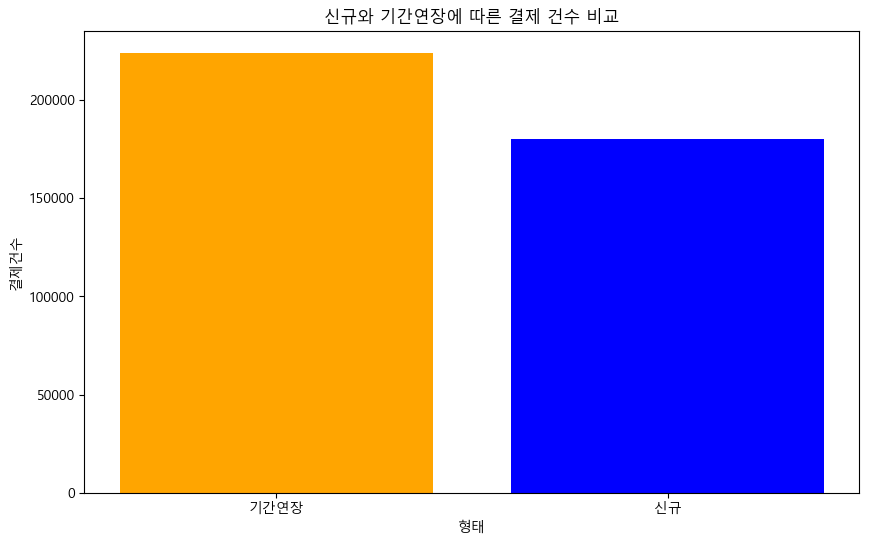

In [92]:
# 신규/기간연장별 결제 건수 계산
new_vs_extension_count = payment.groupby('형태').size().reset_index(name='결제건수')

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(new_vs_extension_count['형태'], new_vs_extension_count['결제건수'], color=['orange', 'blue'])
plt.xlabel('형태')
plt.ylabel('결제건수')
plt.title('신규와 기간연장에 따른 결제 건수 비교')
plt.show()

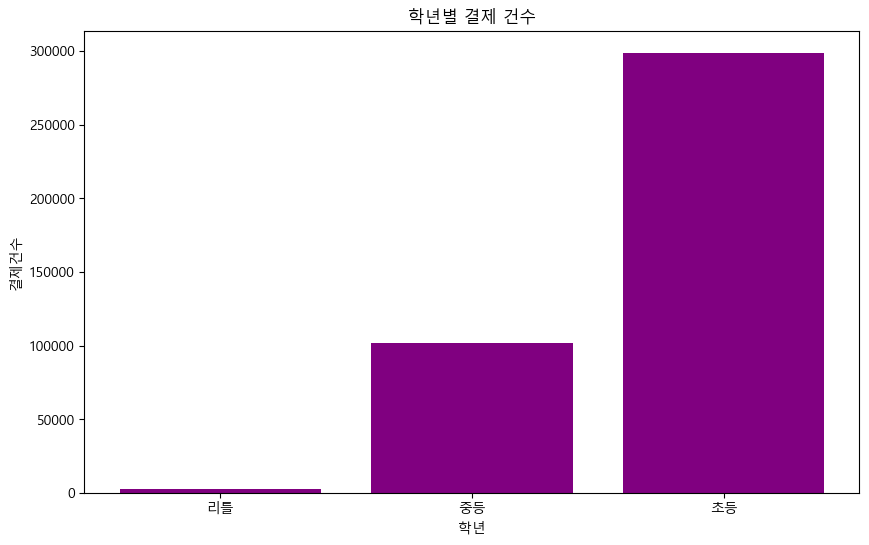

In [93]:
# 학년별 결제 건수 계산
grade_count = payment.groupby('학년_정규화').size().reset_index(name='결제건수')

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(grade_count['학년_정규화'], grade_count['결제건수'], color='purple')
plt.xlabel('학년')
plt.ylabel('결제건수')
plt.title('학년별 결제 건수')
plt.show()

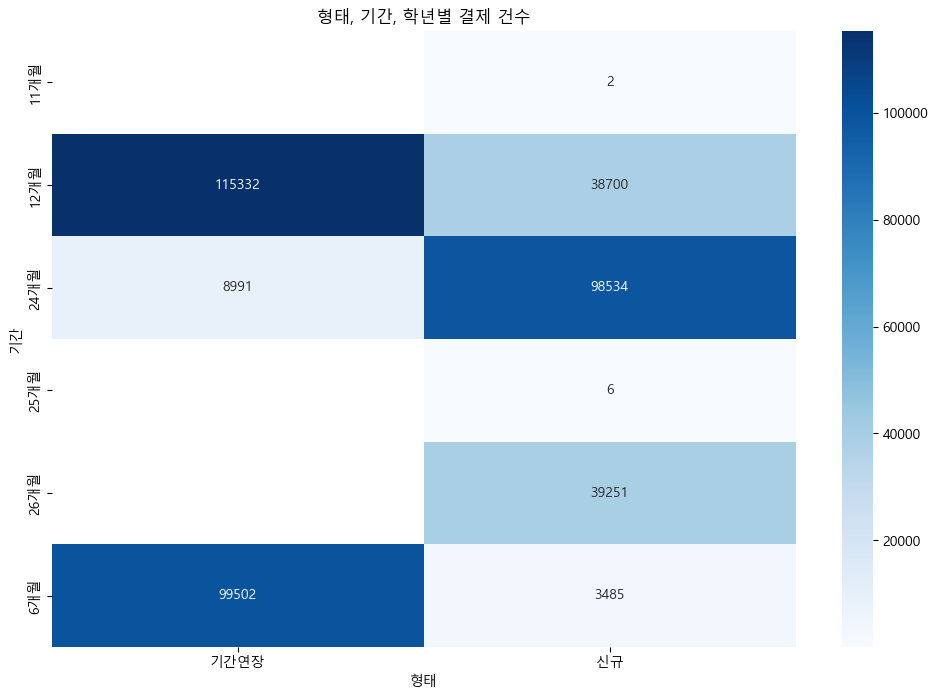

In [94]:
# 복합 그룹화 후 결제 건수 계산
combined_count = payment.groupby(['형태', '기간', '학년_정규화']).size().reset_index(name='결제건수')

# 피벗 테이블로 변환하여 시각화
pivot_table = combined_count.pivot_table(index='기간', columns='형태', values='결제건수', aggfunc='sum')

# 히트맵으로 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='Blues')
plt.title('형태, 기간, 학년별 결제 건수')
plt.xlabel('형태')
plt.ylabel('기간')
plt.show()

In [97]:
# 데이터 확인
payment.head()

,학습 학교 구분,최초결제일,결제금액,상품명,학부모아이디,학습자아이디,실적교사이름,실적교사ID,학생고유ID,결제월,결제년,기간,형태,학년_정규화,상품명_정리,결제구분,기간_숫자
1,초등,2019-01-01,79000,[W형] 12개월 홈런학습/학습기 변경_R,dasomi1514,Kimseoha09,조문희,tc_mh1547,1610794,1,2019,12개월,신규,초등,신규/12개월/초등,월납,12
2,중등,2019-01-01,79000,[중등][S형]기간연장 12개월 학습(월분할결제_ARS),bini0905,bini7007,이연희(M6),tc_nabiya0301,737548,1,2019,12개월,기간연장,중등,기간연장/12개월/중등,월납,12
3,초등,2019-01-01,79000,[W형]홈런 12개월 기간연장(월별선불결제_ARS),jiheonee,subin0106,감정희,tc_kamjh0715,1060642,1,2019,12개월,기간연장,초등,기간연장/12개월/초등,월납,12
4,중등,2019-01-01,134000,[중등][N형]12개월 학습(월분할결제_ARS),eun1976,dkemsla,금정숙(F),tc_kum1077,1559238,1,2019,12개월,신규,중등,신규/12개월/중등,월납,12
5,초등,2019-01-01,79000,[W형]홈런 6개월 기간연장(월별선불결제_ARS),zxc0265,zxcv4571,유희정(종료),tc_yhj2457,1066220,1,2019,6개월,기간연장,초등,기간연장/6개월/초등,월납,6


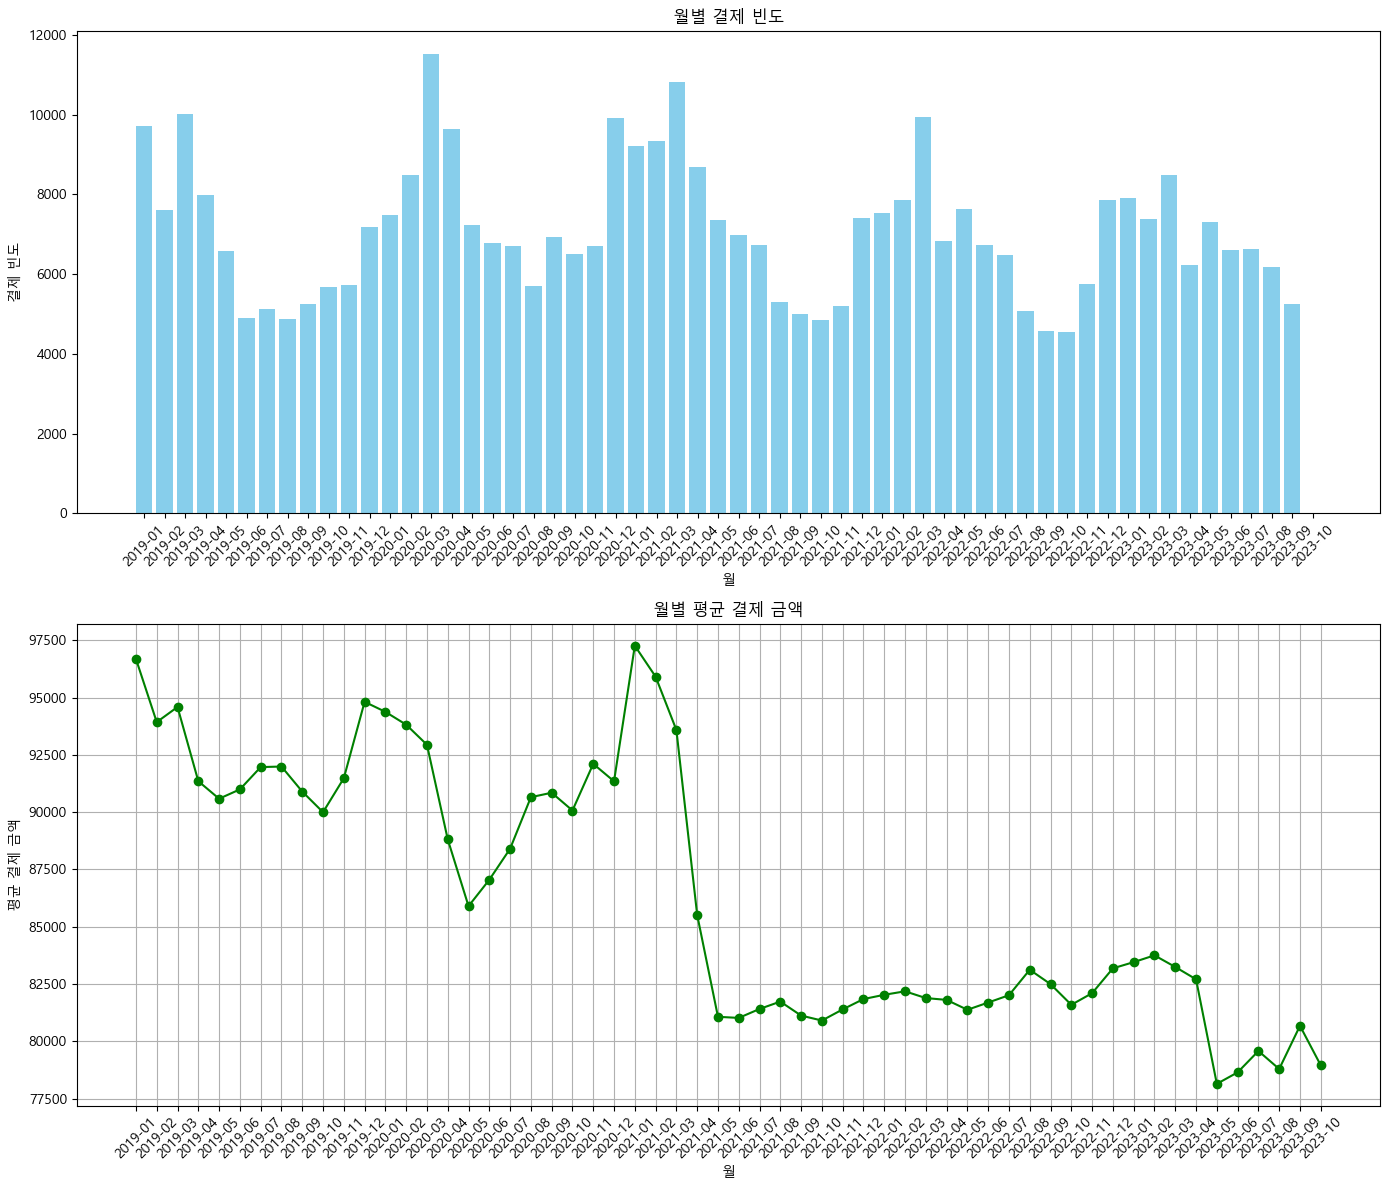

In [108]:
# 데이터 타입 변환
payment['최초결제일'] = pd.to_datetime(payment['최초결제일'])

# 월별 결제 빈도 계산
monthly_payments = payment['최초결제일'].dt.to_period('M').value_counts().sort_index()

# 평균 결제 금액 계산
average_payment_amount = payment.groupby(payment['최초결제일'].dt.to_period('M'))['결제금액'].mean()

# 그래프 2x1 레이아웃 설정
fig, axs = plt.subplots(2, 1, figsize=(14, 12))

# 월별 결제 빈도 그래프
axs[0].bar(monthly_payments.index.astype(str), monthly_payments, color='skyblue')
axs[0].set_title('월별 결제 빈도')
axs[0].set_xlabel('월')
axs[0].set_ylabel('결제 빈도')
axs[0].tick_params(axis='x', rotation=45)

# 평균 결제 금액 그래프
axs[1].plot(average_payment_amount.index.astype(str), average_payment_amount, marker='o', color='green')
axs[1].set_title('월별 평균 결제 금액')
axs[1].set_xlabel('월')
axs[1].set_ylabel('평균 결제 금액')
axs[1].grid(True)
axs[1].tick_params(axis='x', rotation=45)

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [101]:
# 고유한 고객 식별을 위해 '학부모아이디'를 사용
payment['customer_id'] = payment['학부모아이디']

# 재결제 여부 확인 (예시: 동일 고객이 두 번 이상 결제한 경우를 재결제로 간주)
repeated_customers = payment['customer_id'].duplicated(keep=False)
repeated_payments = payment[repeated_customers]

# 재결제율 계산
repeated_rate = len(repeated_payments) / len(payment) * 100
repeated_rate

76.53434967050765